# Phoenix modeling residuals w/grouped features

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from google.cloud import bigquery
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="groovy-groove-309018-3049c669c548.json"
client = bigquery.Client()

import seaborn as sns

### Predictors

In [3]:
phoenix_zip = ['85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173']

In [4]:
%load_ext google.cloud.bigquery

In [5]:
%%bigquery acs_phoenix1
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2011_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173')
UNION ALL
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2012_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');


Downloading: 100%|██████████| 260/260 [00:01<00:00, 139.23rows/s]


In [6]:
%%bigquery acs_phoenix2
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2013_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173')
UNION ALL
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2014_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173')
;

Downloading: 100%|██████████| 260/260 [00:02<00:00, 129.97rows/s]


In [7]:
%%bigquery acs_phoenix3
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2015_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');


Downloading: 100%|██████████| 130/130 [00:01<00:00, 75.60rows/s]


In [8]:
%%bigquery acs_phoenix4
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2016_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173')
;

Downloading: 100%|██████████| 130/130 [00:01<00:00, 73.76rows/s]


In [9]:
%%bigquery acs_phoenix5

SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2017_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173')
;

Downloading: 100%|██████████| 130/130 [00:01<00:00, 78.72rows/s]


In [10]:
%%bigquery acs_phoenix6
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2018_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173')

Downloading: 100%|██████████| 130/130 [00:01<00:00, 73.53rows/s]


In [11]:
acs_cols1=acs_phoenix1.columns
acs_cols2=acs_phoenix2.columns
acs_cols3=acs_phoenix3.columns
acs_cols4=acs_phoenix4.columns
acs_cols5=acs_phoenix5.columns
acs_cols6=acs_phoenix6.columns

common_columns=list((((((set(acs_cols1).intersection
                        (set(acs_cols2))).intersection
                        (set(acs_cols3))).intersection
                        (set(acs_cols4))).intersection
                        (set(acs_cols5))).intersection
                        (set(acs_cols6))))

In [12]:
dfs=[acs_phoenix1[common_columns],
    acs_phoenix2[common_columns],
    acs_phoenix3[common_columns],
    acs_phoenix4[common_columns],
    acs_phoenix5[common_columns],
    acs_phoenix6[common_columns]]

acs_all_phoenix=pd.concat(dfs)
acs_all_phoenix.shape

(1040, 234)

In [13]:
acs_all_phoenix['do_date'] = acs_all_phoenix['do_date'].astype(str)
acs_all_phoenix['year'] = np.where(acs_all_phoenix['do_date'] =='20072011', '2011',
                                  np.where(acs_all_phoenix['do_date'] =='20082012','2012',
                                  np.where(acs_all_phoenix['do_date'] =='20092013','2013',
                                  np.where(acs_all_phoenix['do_date'] =='20102014','2014',
                                  np.where(acs_all_phoenix['do_date'] =='20112015','2015',
                                  np.where(acs_all_phoenix['do_date'] =='20122016','2016',
                                  np.where(acs_all_phoenix['do_date'] =='20132017','2017',
                                  np.where(acs_all_phoenix['do_date'] =='2014-01-01','2018',
                                           None))))))))

In [14]:
acs_all_phoenix['year'] = acs_all_phoenix['year'].astype('string')


In [15]:
acs_all_phoenix.head()

,commute_less_10_mins,male_45_64_associates_degree,female_under_5,vacant_housing_units_for_sale,high_school_including_ged,female_75_to_79,in_grades_1_to_4,asian_male_55_64,female_65_to_66,rent_10_to_15_percent,employed_information,female_5_to_9,male_67_to_69,sales_office_employed,children_in_single_female_hh,million_dollar_housing_units,female_85_and_over,geo_id,median_age,gini_index,owner_occupied_housing_units_upper_value_quartile,worked_at_home,dwellings_2_units,male_65_to_66,male_25_to_29,female_21,renter_occupied_housing_units_paying_cash_median_gross_rent,male_70_to_74,commuters_16_over,group_quarters,employed_public_administration,employed_other_services_not_public_admin,commuters_by_car_truck_van,pop_determined_poverty_status,households_public_asst_or_food_stamps,median_rent,other_race_pop,income_150000_199999,not_us_citizen_pop,employed_retail_trade,walked_to_work,income_30000_34999,in_school,occupation_natural_resources_construction_maintenance,vacant_housing_units_for_rent,male_45_to_49,two_cars,income_125000_149999,armed_forces,median_year_structure_built,male_20,male_45_to_64,commuters_by_carpool,four_more_cars,amerindian_pop,associates_degree,rent_under_10_percent,income_40000_44999,housing_built_1939_or_earlier,female_18_to_19,income_60000_74999,aggregate_travel_time_to_work,male_10_to_14,mobile_homes,male_male_households,female_30_to_34,housing_built_2000_to_2004,two_parents_not_in_labor_force_families_with_young_children,male_45_64_grade_9_12,employed_wholesale_trade,income_50000_59999,employed_arts_entertainment_recreation_accommodation_food,income_25000_29999,female_62_to_64,rent_35_to_40_percent,male_15_to_17,commute_15_19_mins,occupation_services,two_or_more_races_pop,hispanic_male_45_54,income_15000_19999,asian_male_45_54,pop_25_years_over,commuters_by_subway_or_elevated,female_20,income_100000_124999,male_22_to_24,male_under_5,female_67_to_69,hispanic_male_55_64,income_35000_39999,less_one_year_college,owner_occupied_housing_units_lower_value_quartile,some_college_and_associates_degree,male_45_64_less_than_9_grade,housing_built_2005_or_later,different_house_year_ago_same_city,two_parent_families_with_young_children,masters_degree,rent_20_to_25_percent,pop_5_years_over,percent_income_spent_on_rent,female_35_to_39,commute_25_29_mins,graduate_professional_degree,male_45_64_bachelors_degree,employed_finance_insurance_real_estate,income_75000_99999,female_10_to_14,male_5_to_9,commute_60_more_mins,occupation_sales_office,female_60_to_61,income_less_10000,population_1_year_and_over,bachelors_degree,one_year_more_college,male_18_to_19,not_in_labor_force,income_45000_49999,owner_occupied_housing_units_median_value,employed_agriculture_forestry_fishing_hunting_mining,no_car,white_pop,commute_35_44_mins,dwellings_1_units_attached,female_22_to_24,management_business_sci_arts_employed,three_cars,less_than_high_school_graduate,income_200000_or_more,unemployed_pop,employed_education_health_social,hispanic_pop,income_20000_24999,speak_spanish_at_home_low_english,white_male_55_64,dwellings_3_to_4_units,male_50_to_54,pop_in_labor_force,male_85_and_over,male_80_to_84,married_households,female_80_to_84,commuters_drove_alone,income_per_capita,occupation_production_transportation_material,employed_science_management_admin_waste,no_cars,male_21,female_25_to_29,pop_16_over,female_40_to_44,high_school_diploma,male_pop,female_55_to_59,female_70_to_74,female_pop,in_grades_9_to_12,rent_over_50_percent,income_10000_14999,housing_units_renter_occupied,different_house_year_ago_different_city,civilian_labor_force,employed_transportation_warehousing_utilities,in_undergrad_college,asian_pop,rent_burden_not_computed,commuters_by_public_transportation,male_35_to_39,black_male_55_64,median_income,total_pop,nonfamily_households,households,one_parent_families_with_young_children,rent_30_to_35_percent,dwellings_1_units_detached,black_male_45_54,mortgaged_housing_units,employed_manufacturing,owner_occupied_housing_units,commute_20_24_mins,femal

In [16]:
missing_zip = [el for el in phoenix_zip if el not in list(acs_all_phoenix['geo_id'])]
missing_zip

['85378']

#### Grouping female age columns together

In [17]:
female_under_18 = acs_all_phoenix.female_under_5 + acs_all_phoenix.female_5_to_9 + acs_all_phoenix.female_10_to_14 + acs_all_phoenix.female_15_to_17 + acs_all_phoenix.female_18_to_19
female_under_60 = acs_all_phoenix.female_20 + acs_all_phoenix.female_21 + acs_all_phoenix.female_22_to_24 + acs_all_phoenix.female_25_to_29 + acs_all_phoenix.female_30_to_34 + acs_all_phoenix.female_35_to_39 + acs_all_phoenix.female_40_to_44 + acs_all_phoenix.female_45_to_49 + acs_all_phoenix.female_50_to_54 + acs_all_phoenix.female_55_to_59 
female_over_60 = acs_all_phoenix.female_60_to_61 + acs_all_phoenix.female_62_to_64 + acs_all_phoenix.female_65_to_66 + acs_all_phoenix.female_67_to_69 + acs_all_phoenix.female_70_to_74 + acs_all_phoenix.female_75_to_79 + acs_all_phoenix.female_80_to_84 + acs_all_phoenix.female_85_and_over

In [18]:
female_under_18 = female_under_18.astype(float)
female_under_60 = female_under_60.astype(float)
female_over_60 = female_over_60.astype(float)

#### Grouping male age columns together

In [19]:
male_under_18 = acs_all_phoenix.male_under_5 + acs_all_phoenix.male_5_to_9 + acs_all_phoenix.male_10_to_14 + acs_all_phoenix.male_15_to_17 + acs_all_phoenix.male_18_to_19
male_under_60 = acs_all_phoenix.male_20 + acs_all_phoenix.male_21 + acs_all_phoenix.male_22_to_24 + acs_all_phoenix.male_25_to_29 + acs_all_phoenix.male_30_to_34 + acs_all_phoenix.male_35_to_39 + acs_all_phoenix.male_40_to_44 + acs_all_phoenix.male_45_to_49 + acs_all_phoenix.male_50_to_54 + acs_all_phoenix.male_55_to_59 
male_over_60 =  acs_all_phoenix.male_65_to_66 + acs_all_phoenix.male_67_to_69 + acs_all_phoenix.male_70_to_74 + acs_all_phoenix.male_75_to_79 + acs_all_phoenix.male_80_to_84 + acs_all_phoenix.male_85_and_over

In [20]:
male_under_18 = male_under_18.astype(float)
male_under_60 = male_under_60.astype(float)
male_over_60 = male_over_60.astype(float)

#### Grouping rent affordability columns together

In [21]:
under10 = acs_all_phoenix.rent_under_10_percent
tento50 = acs_all_phoenix.rent_40_to_50_percent + acs_all_phoenix.rent_35_to_40_percent + acs_all_phoenix.rent_30_to_35_percent+ acs_all_phoenix.rent_25_to_30_percent + acs_all_phoenix.rent_20_to_25_percent + acs_all_phoenix.rent_15_to_20_percent + acs_all_phoenix.rent_10_to_15_percent
over50 = acs_all_phoenix.rent_over_50_percent
uncomputed = acs_all_phoenix.rent_burden_not_computed

In [22]:
rent_under10 = under10.astype(float)
rent_tento50 = tento50.astype(float)
rent_over50 = over50.astype(float)
rent_uncomputed = uncomputed.astype(float)

#### Grouping dwellings columns together

In [23]:
small_dwellings = acs_all_phoenix.dwellings_1_units_attached + acs_all_phoenix.dwellings_1_units_detached + acs_all_phoenix.dwellings_2_units + acs_all_phoenix.dwellings_3_to_4_units + acs_all_phoenix.dwellings_5_to_9_units
large_dwellings = acs_all_phoenix.dwellings_10_to_19_units + acs_all_phoenix.dwellings_20_to_49_units + acs_all_phoenix.dwellings_50_or_more_units

In [24]:
small_dwellings = small_dwellings.astype(float)
large_dwellings = large_dwellings.astype(float)

#### Grouping commute time together

In [25]:
commute_less_than_30 =  acs_all_phoenix.commute_less_10_mins + acs_all_phoenix.commute_10_14_mins + acs_all_phoenix.commute_15_19_mins + acs_all_phoenix.commute_20_24_mins + acs_all_phoenix.commute_25_29_mins
commute_less_than_60 = acs_all_phoenix.commute_30_34_mins + acs_all_phoenix.commute_35_44_mins +  acs_all_phoenix.commute_45_59_mins
commute_over_60 =  acs_all_phoenix.commute_60_more_mins 

In [26]:
commute_less_than_30 = commute_less_than_30.astype(float)
commute_less_than_60 = commute_less_than_60.astype(float)
commute_over_60 = commute_over_60.astype(float)

#### Grouping income levels together

In [27]:
income_less_than_60000 = acs_all_phoenix.income_less_10000 + acs_all_phoenix.income_10000_14999 + acs_all_phoenix.income_15000_19999 + acs_all_phoenix.income_20000_24999 + acs_all_phoenix.income_25000_29999 + acs_all_phoenix.income_30000_34999 + acs_all_phoenix.income_35000_39999 + acs_all_phoenix.income_40000_44999 + acs_all_phoenix.income_45000_49999 + acs_all_phoenix.income_50000_59999
income_less_than_125000 = acs_all_phoenix.income_60000_74999 + acs_all_phoenix.income_75000_99999 + acs_all_phoenix.income_100000_124999
income_over_125000 = acs_all_phoenix.income_125000_149999 + acs_all_phoenix.income_150000_199999 + acs_all_phoenix.income_200000_or_more

In [28]:
income_less_than_60000 = income_less_than_60000.astype(float)
income_less_than_125000 = income_less_than_125000.astype(float)
income_over_125000 = income_over_125000.astype(float)

#### Grouping employment industries together

In [29]:
employed_creative = acs_all_phoenix.employed_arts_entertainment_recreation_accommodation_food
employed_prof = acs_all_phoenix.employed_education_health_social + acs_all_phoenix.employed_finance_insurance_real_estate + acs_all_phoenix.employed_information + acs_all_phoenix.employed_science_management_admin_waste
employed_skill = acs_all_phoenix.employed_manufacturing + acs_all_phoenix.employed_construction + acs_all_phoenix.employed_agriculture_forestry_fishing_hunting_mining
employed_service = acs_all_phoenix.employed_retail_trade + acs_all_phoenix.employed_other_services_not_public_admin + acs_all_phoenix.employed_public_administration + acs_all_phoenix.employed_transportation_warehousing_utilities + acs_all_phoenix.employed_wholesale_trade

#### Choosing family type columns

In [30]:
two_parent_hh = acs_all_phoenix.two_parent_families_with_young_children.astype(float)
one_parent_hh = acs_all_phoenix.one_parent_families_with_young_children.astype(float)

#### Choosing population columns

In [31]:
asian_pop = acs_all_phoenix.asian_pop.astype(float)
black_pop = acs_all_phoenix.black_pop.astype(float)
hispanic_pop = acs_all_phoenix.hispanic_pop.astype(float)
white_pop = acs_all_phoenix.white_pop.astype(float)
amerindian_pop = acs_all_phoenix.amerindian_pop.astype(float)
other_race_pop = acs_all_phoenix.other_race_pop.astype(float)
two_or_more_races_pop = acs_all_phoenix.other_race_pop.astype(float)
not_hispanic_pop = acs_all_phoenix.not_hispanic_pop.astype(float)
not_us_citizen_pop = acs_all_phoenix.not_us_citizen_pop.astype(float)
total_pop = acs_all_phoenix.total_pop.astype(float)

In [32]:
pop_columns = [asian_pop, amerindian_pop, black_pop, hispanic_pop, white_pop,other_race_pop,two_or_more_races_pop]

In [33]:
print(asian_pop.sum()+amerindian_pop.sum()+black_pop.sum()+hispanic_pop.sum()+white_pop.sum()+other_race_pop.sum()+two_or_more_races_pop.sum())
print(total_pop.sum())
print(not_hispanic_pop.sum()+hispanic_pop.sum())

32684353.0
33380739.0
33380739.0


#### Grouping education level columns together

In [34]:
college_educated = acs_all_phoenix.in_undergrad_college + acs_all_phoenix.some_college_and_associates_degree + acs_all_phoenix.associates_degree + acs_all_phoenix.bachelors_degree + acs_all_phoenix.bachelors_degree_2 +acs_all_phoenix.bachelors_degree_or_higher_25_64 + acs_all_phoenix.masters_degree + acs_all_phoenix.graduate_professional_degree + acs_all_phoenix.one_year_more_college     
in_school = acs_all_phoenix.in_grades_1_to_4 + acs_all_phoenix.in_grades_5_to_8 + acs_all_phoenix.in_grades_9_to_12
inschoolcheck = acs_all_phoenix.in_school
less_than_college_educated = acs_all_phoenix.less_one_year_college + + acs_all_phoenix.less_one_year_college
high_school_educated = acs_all_phoenix.high_school_diploma + acs_all_phoenix.high_school_including_ged

In [35]:
college_educated = college_educated.astype(float)
in_school = in_school.astype(float)
inschoolcheck = inschoolcheck.astype(float) 
less_than_college_educated = less_than_college_educated.astype(float)
high_school_educated = high_school_educated.astype(float)

In [36]:
print(in_school.sum())
print(inschoolcheck.sum())

5726362.0
8996436.0


#### Grouping commute type columns together

In [37]:
public_commute = acs_all_phoenix.commuters_by_public_transportation + acs_all_phoenix.commuters_by_subway_or_elevated + acs_all_phoenix.commuters_by_bus
personal_commute = acs_all_phoenix.commuters_by_car_truck_van + acs_all_phoenix.commuters_by_carpool + acs_all_phoenix.commuters_drove_alone

In [38]:
public_commute = public_commute.astype(float)
personal_commute = personal_commute.astype(float)

#### Choosing housing units columns

In [39]:
vacant_housing_units = acs_all_phoenix.vacant_housing_units.astype(float)
vacant_housing_units_for_rent = acs_all_phoenix.vacant_housing_units_for_rent.astype(float)
vacant_housing_units_for_sale = acs_all_phoenix.vacant_housing_units_for_sale.astype(float)

In [40]:
print(vacant_housing_units.sum())
print(vacant_housing_units_for_rent.sum()+vacant_housing_units_for_sale.sum())

1913554.0
687179.0


#### Choosing owner occuppied housing units

In [41]:
owner_occupied_housing_units = acs_all_phoenix.owner_occupied_housing_units.astype(float)
owner_occupied_housing_units_lower_value_quartile = acs_all_phoenix.owner_occupied_housing_units_lower_value_quartile.astype(float)
owner_occupied_housing_units_median_value = acs_all_phoenix.owner_occupied_housing_units_median_value.astype(float)
owner_occupied_housing_units_upper_value_quartile = acs_all_phoenix.owner_occupied_housing_units_upper_value_quartile.astype(float)

#### Choosing employment information

In [42]:
unemployed_pop = acs_all_phoenix.unemployed_pop.astype(float)
employed_pop = acs_all_phoenix.employed_pop.astype(float)

#### Choosing family information

In [43]:
family_households = acs_all_phoenix.family_households.astype(float)
nonfamily_households = acs_all_phoenix.nonfamily_households.astype(float)

#### Choosing remaining miscelleanous columns

In [44]:
Year = acs_all_phoenix.year.astype(int)
geo_id = acs_all_phoenix.geo_id.astype(int)
gini_index = acs_all_phoenix.gini_index.astype(float)
income_per_capita = acs_all_phoenix.income_per_capita.astype(float)
median_age = acs_all_phoenix.median_age.astype(float)
median_income = acs_all_phoenix.median_income.astype(float)
married_households = acs_all_phoenix.married_households.astype(float)

#### Building the final dataframe for ACS features before combining with ZRI information

In [45]:
dict = {'Year': Year, 'geo_id': geo_id, 'gini_index':gini_index, 'income_per_capita':income_per_capita,
       'median_age':median_age, 'median_income':median_income, 'married_households':married_households,
       'family_households':family_households, 'nonfamily_households':nonfamily_households,
       'unemployed_pop':unemployed_pop, 'employed_pop':employed_pop, 'owner_occupied_housing_units':owner_occupied_housing_units,
       'owner_occupied_housing_units_lower_value_quartile':owner_occupied_housing_units_lower_value_quartile,
       'owner_occupied_housing_units_median_value':owner_occupied_housing_units_median_value,
       'owner_occupied_housing_units_upper_value_quartile':owner_occupied_housing_units_upper_value_quartile,
       'vacant_housing_units':vacant_housing_units,'vacant_housing_units_for_rent':vacant_housing_units_for_rent,
       'vacant_housing_units_for_sale':vacant_housing_units_for_sale, 'public_commute':public_commute,
       'personal_commute':personal_commute, 'college_educated':college_educated, 'in_school':in_school,
       'less_than_college_educated':less_than_college_educated, 'high_school_educated':high_school_educated,
       'asian_pop':asian_pop, 'amerindian_pop':amerindian_pop, 'black_pop':black_pop, 'hispanic_pop':hispanic_pop, 
       'income_less_than_60000':income_less_than_60000,
       'income_less_than_125000':income_less_than_125000, 'income_over_125000':income_over_125000,
       'commute_less_than_30':commute_less_than_30, 'commute_less_than_60':commute_less_than_60,
       'commute_over_60':commute_over_60, 'small_dwellings':small_dwellings, 'large_dwellings':large_dwellings,
       'rent_under10':rent_under10, 'rent_tento50':rent_tento50, 'rent_over50':rent_over50, 'rent_uncomputed':rent_uncomputed,
       'male_under_18':male_under_18, 'male_under_60':male_under_60, 'male_over_60':male_over_60,
       'female_under_18':female_under_18, 'female_under_60':female_under_60, 'female_over_60':female_over_60}

In [46]:
acs_final = pd.DataFrame(dict)

In [47]:
acs_final.shape

(1040, 46)

In [48]:
acs_final.head()

,Year,geo_id,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60
0,2011,85087,0.3366,33750.0,41.5,78063.0,1471.0,1654.0,489.0,166.0,3162.0,1821.0,218400.0,294100.0,399200.0,694.0,26.0,245.0,22.0,5370.0,NaN,995.0,NaN,NaN,200.0,33.0,248.0,372.0,682.0,975.0,486.0,1182.0,1245.0,389.0,2531.0,0.0,33.0,289.0,0.0,0.0,923.0,1703.0,346.0,734.0,1551.0,412.0
1,2011,85296,0.3476,31066.0,30.9,82724.0,7995.0,9742.0,2423.0,1591.0,19917.0,9093.0,197000.0,256700.0,353500.0,529.0,31.0,145.0,142.0,36286.0,NaN,8073.0,NaN,NaN,2432.0,58.0,1538.0,5562.0,3743.0,5965.0,2457.0,11008.0,5938.0,1637.0,12511.0,170.0,37.0,2476.0,456.0,103.0,6858.0,10908.0,889.0,6276.0,11420.0,1671.0
2,2011,85302,0.4077,22735.0,35.1,47884.0,5818.0,9517.0,5026.0,2114.0,17354.0,8659.0,105300.0,160300.0,217600.0,1899.0,825.0,300.0,2239.0,29468.0,NaN,6014.0,NaN,NaN,1219.0,322.0,2599.0,10095.0,9216.0,4530.0,797.0,9553.0,5932.0,1060.0,12131.0,3820.0,124.0,3840.0,1608.0,312.0,4830.0,9803.0,1702.0,5248.0,10839.0,3812.0
3,2011,85390,0.5170,30725.0,53.9,40331.0,2193.0,2576.0,1619.0,440.0,2634.0,2954.0,109900.0,235200.0,417500.0,1103.0,147.0,45.0,0.0,4594.0,NaN,933.0,NaN,NaN,0.0,7.0,86.0,841.0,2808.0,1062.0,325.0,1646.0,337.0,508.0,4159.0,243.0,82.0,747.0,318.0,94.0,842.0,1667.0,1418.0,712.0,1867.0,1767.0
4,2011,85209,0.3623,25637.0,42.1,54409.0,9094.0,11248.0,4154.0,1071.0,15353.0,11876.0,110500.0,190800.0,270300.0,3313.0,408.0,216.0,298.0,27962.0,NaN,6934.0,NaN,NaN,657.0,654.0,1796.0,5662.0,8507.0,5374.0,1521.0,7992.0,5320.0,1197.0,13816.0,666.0,172.0,2464.0,585.0,305.0,5852.0,8426.0,4294.0,4600.0,8332.0,6910.0


## Label

This time keep the data into a monthly granularity

In [49]:
zri_all = pd.read_csv('./data/Zip_Zri_AllHomesPlusMultifamily.csv')

In [50]:
zri_all.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,3031.0,3058.0,3031.0,3015.0,2976.0,2914.0,2860.0,2811.0,2792.0,2799.0,2820.0,2852.0,2885.0,2905.0,2883.0,2879.0,2905.0,2916.0,2908.0,2915.0,2920.0,2920.0,2938.0,2999.0,3029.0,3022.0,3049.0,3083.0,3086.0,3072.0,3081.0,3095.0,3147.0,3190.0,3188.0,3149.0,3149.0,3174.0,3175.0,3230.0,3267.0,3285.0,3234.0,3296.0,3357.0,3366.0,NaN,3186.0,3204.0,NaN,NaN,NaN,3682.0,3767.0,3767.0,3811.0,3793.0,3894.0,3919.0,NaN,NaN,NaN,NaN,4166.0,4164.0,4133.0,4015.0,3943.0,3945.0,4051.0,NaN,NaN,NaN,NaN,4916.0,NaN,5009.0,NaN,NaN,NaN,NaN,3988.0,NaN,NaN,3661.0,NaN,NaN,NaN,NaN,3512.0,3552.0,NaN,3768.0,3731.0,3634.0,NaN,NaN,3300.0,3227.0,NaN,NaN,NaN,NaN,3785.0,3788.0,3786.0,3784.0,3766.0,3779.0,3843.0,3873.0,3835.0,NaN
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,1790.0,1787.0,1784.0,1774.0,1755.0,1742.0,1735.0,1741.0,1742.0,1757.0,1790.0,1817.0,1839.0,1841.0,1844.0,1844.0,1820.0,1818.0,1829.0,1843.0,1860.0,1878.0,1898.0,1889.0,1890.0,1894.0,1897.0,1886.0,1884.0,1887.0,1907.0,1918.0,1925.0,1948.0,1996.0,2017.0,2011.0,2002.0,1989.0,1984.0,1979.0,1976.0,1969.0,1989.0,1996.0,2001.0,2006.0,2009.0,2032.0,2045.0,2038.0,2028.0,2016.0,2028.0,2033.0,2027.0,2041.0,2071.0,2100.0,2136.0,2139.0,2119.0,2093.0,2079.0,2061.0,2058.0,2079.0,2100.0,2115.0,2150.0,2184.0,2201.0,2212.0,2207.0,2182.0,2136.0,2108.0,2104.0,2117.0,2118.0,2125.0,2146.0,2168.0,2183.0,2165.0,2128.0,2097.0,2070.0,2057.0,2052.0,2054.0,2061.0,2074.0,2106.0,2134.0,2146.0,2155.0,2149.0,2116.0,2076.0,2025.0,2014.0,2017.0,2039.0,2070.0,2105.0,2140.0,2168.0,2185.0,2125.0,NaN,2053.0,1996.0
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,3,3269.0,3304.0,3320.0,3322.0,3283.0,3225.0,3133.0,3086.0,3017.0,3005.0,3010.0,3016.0,3028.0,3069.0,3020.0,2999.0,2988.0,3023.0,3037.0,3055.0,3069.0,3058.0,3065.0,3104.0,3117.0,3118.0,3124.0,3128.0,3098.0,3078.0,3119.0,3150.0,3183.0,3227.0,3233.0,3199.0,3217.0,3255.0,3274.0,3346.0,3357.0,3363.0,3287.0,3312.0,3385.0,3385.0,NaN,3231.0,3258.0,NaN,NaN,NaN,NaN,4011.0,3985.0,4026.0,4012.0,NaN,NaN,NaN,NaN,NaN,NaN,4734.0,4800.0,4690.0,4693.0,NaN,4418.0,4534.0,NaN,4753.0,4687.0,4788.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4176.0,NaN,3997.0,3924.0,NaN,NaN,NaN,NaN,3802.0,3809.0,3900.0,3999.0,4043.0,3957.0,NaN,NaN,3611.0,3560.0,NaN,NaN,NaN,3928.0,3874.0,3898.0,3917.0,3929.0,3931.0,3963.0,NaN,4123.0,4079.0,NaN
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,1547.0,1549.0,1560.0,1560.0,1542.0,1547.0,1559.0,1578.0,1591.0,1597.0,1604.0,1609.0,1607.0,1598.0,1591.0,1591.0,1606.0,1614.0,1617.0,1612.0,1611.0,1617.0,1630.0,1640.0,1649.0,1655.0,1658.0,1658.0,1661.0,1675.0,1698.0,1727.0,1753.0,1771.0,1789.0,1808.0,1852.0,1882.0,1906.0,1920.0,1930.0,1936.0,1931.0,1925.0,1929.0,1935.0,1953.0,1967.0,1984.0,1994.0,1999.0,1999.0,1945.0,1917.0,1906.0,1903.0,1908.0,1919.0,1933.0,1944.0,1931.0,1924.0,1918.0,1915.0,1881.0,1859.0,1839.0,1828.0,1827.0,1826.0,1830.0,1826.0,1801.0,1782.0,1772.0,1767.0,1765.0,1763.0,1762.0,1760.0,1752.0,1753.0,1757

In [51]:
zri_phoenix = zri_all[zri_all['RegionName'].isin(phoenix_zip)]
zri_phoenix.shape

(131, 120)

In [52]:
valueCols=[col for col in zri_phoenix.columns if '20' in col] #columns with the indices
indexCols=[col for col in zri_phoenix.columns if '20' not in col] #columns without the indices
zri_long=pd.melt(zri_phoenix, id_vars=indexCols,value_vars=valueCols, var_name="year_month",
                 value_name="zri")
zri_long['year_month'] = pd.to_datetime(zri_long['year_month'])
zri_long['year'] = zri_long['year_month'].dt.year
zri_long['year'] = zri_long['year'].astype('string')
zri_long['month'] = zri_long['year_month'].dt.month
zri_long['month'] = zri_long['month'].astype('string')
zri_long['RegionName'] = zri_long['RegionName'].astype('string')
zri_long.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,year_month,zri,year,month
0,94748,85032,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,70,2010-09-01,1155.0,2010,9
1,94870,85281,Tempe,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,106,2010-09-01,1069.0,2010,9
2,94820,85225,Chandler,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,115,2010-09-01,1048.0,2010,9
3,94890,85308,Glendale,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,147,2010-09-01,1049.0,2010,9
4,417444,85142,Queen Creek,AZ,Phoenix-Mesa-Scottsdale,Pinal County,293,2010-09-01,1271.0,2010,9


In [423]:
acs_final['geo_id'] = acs_final['geo_id'].astype('string')
acs_final['Year'] = acs_final['Year'].astype('string')


In [425]:
full_df = pd.merge(zri_long, acs_final, how = 'left', left_on = ['RegionName', 'year'], 
                  right_on = ['geo_id', 'Year' ])
print(full_df.shape)
full_df.sample(5)

(14803, 57)


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,year_month,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60
2037,94798,85203,Mesa,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,2967,2011-12-01,988.0,2011,12,2011,85203,0.4434,23137.0,31.8,46625.0,5885.0,7916.0,3859.0,1218.0,15100.0,7152.0,131900.0,203200.0,286700.0,1536.0,907.0,189.0,450.0,26518.0,NaN,5562.0,NaN,NaN,362.0,1211.0,420.0,9030.0,7261.0,3314.0,1200.0,8604.0,5083.0,439.0,10703.0,2135.0,122.0,3202.0,981.0,318.0,5424.0,9814.0,1336.0,4779.0,8711.0,2639.0
8674,94734,85018,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,1123,2016-03-01,1527.0,2016,3,2016,85018,0.5627,46310.0,38.3,56653.0,5783.0,8545.0,8261.0,1135.0,20756.0,9146.0,222400.0,393100.0,687300.0,2675.0,534.0,430.0,1174.0,34004.0,48694.0,5126.0,2826.0,9372.0,1371.0,617.0,1042.0,8328.0,8675.0,4357.0,3774.0,15086.0,3325.0,467.0,14936.0,4462.0,278.0,5135.0,1785.0,462.0,4339.0,11133.0,2393.0,4325.0,11315.0,3975.0
13992,399652,85083,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,6631,2019-07-01,1629.0,2019,7,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8748,94854,85262,Scottsdale,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,6109,2016-03-01,2692.0,2016,3,2016,85262,0.5054,86483.0,57.3,129564.0,3380.0,3684.0,1011.0,224.0,4339.0,4274.0,467600.0,675800.0,1050800.0,2585.0,75.0,343.0,0.0,6502.0,17747.0,965.0,930.0,1978.0,719.0,44.0,226.0,112.0,1008.0,1245.0,2442.0,1071.0,1835.0,458.0,7280.0,0.0,0.0,389.0,0.0,32.0,908.0,2028.0,2073.0,534.0,2310.0,2179.0
13880,95007,85623,Oracle,AZ,Phoenix-Mesa-Scottsdale,Pinal County,10537,2019-06-01,1305.0,2019,6,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [426]:
%%bigquery area_zip

SELECT  zip_code, area_land_meters, area_water_meters

FROM `bigquery-public-data.geo_us_boundaries.zip_codes`

Downloading: 100%|██████████| 33113/33113 [00:01<00:00, 17237.57rows/s]


In [427]:
cols = area_zip.columns
area_zip[cols] = area_zip[cols].apply(pd.to_numeric, errors='coerce')
area_zip['zip_code'] = area_zip['zip_code'].astype(str)
full_df['geo_id'] = full_df['geo_id'].astype(str)

In [428]:
full_df = pd.merge(full_df, area_zip, how = 'left', left_on = 'geo_id',
                      right_on = 'zip_code')
full_df.sample(5)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,year_month,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60,zip_code,area_land_meters,area_water_meters
6376,94955,85381,Peoria,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,4533,2014-09-01,1158.0,2014,9,2014,85381,0.3621,31298.0,42.7,70980.0,5034.0,6700.0,2898.0,862.0,12898.0,6441.0,140700.0,191100.0,270300.0,1239.0,339.0,441.0,212.0,23470.0,28969.0,4108.0,2830.0,9166.0,959.0,128.0,783.0,3198.0,3988.0,3933.0,1677.0,6443.0,4798.0,861.0,8473.0,2332.0,80.0,2347.0,606.0,124.0,2919.0,7060.0,1796.0,3077.0,7052.0,3323.0,85381,17221013.0,16075.0
9166,94855,85263,Rio Verde,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,11114,2016-06-01,1935.0,2016,6,2016,85263,0.4490,58346.0,70.5,74737.0,1012.0,1030.0,130.0,0.0,532.0,1140.0,363600.0,479200.0,649000.0,831.0,0.0,134.0,0.0,698.0,3738.0,0.0,184.0,658.0,14.0,16.0,0.0,16.0,403.0,410.0,347.0,101.0,135.0,128.0,1883.0,0.0,0.0,0.0,0.0,20.0,16.0,148.0,917.0,50.0,181.0,930.0,85263,874999879.0,10343255.0
7436,94735,85019,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,5807,2015-05-01,1030.0,2015,5,2015,85019,0.4899,10259.0,29.4,25057.0,2491.0,4892.0,2131.0,1270.0,8112.0,3561.0,55200.0,78100.0,115300.0,1462.0,698.0,91.0,718.0,14114.0,9945.0,5451.0,1346.0,7869.0,707.0,313.0,1616.0,17457.0,5878.0,1050.0,95.0,3903.0,3063.0,697.0,6993.0,1406.0,38.0,1378.0,1306.0,740.0,4703.0,6889.0,834.0,3919.0,6542.0,1441.0,85019,9712661.0,16769.0
11818,94734,85018,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,1123,2018-03-01,1625.0,2018,3,2018,85018,0.5491,51784.0,38.4,66150.0,6291.0,8778.0,8429.0,815.0,21128.0,9157.0,275800.0,495200.0,778700.0,2411.0,397.0,381.0,953.0,35894.0,52374.0,5073.0,2438.0,8603.0,1383.0,381.0,1179.0,7802.0,8109.0,4268.0,4830.0,15089.0,3762.0,470.0,14743.0,4753.0,310.0,5633.0,1585.0,522.0,4766.0,11358.0,2442.0,4048.0,10838.0,4158.0,85018,28797517.0,101356.0
11415,94800,85205,Mesa,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,748,2017-12-01,1222.0,2017,12,2017,85205,0.4595,29241.0,49.6,50050.0,7907.0,10541.0,6698.0,1077.0,17086.0,11965.0,99400.0,162500.0,240200.0,5231.0,539.0,249.0,475.0,29962.0,41598.0,5222.0,6810.0,16031.0,480.0,783.0,611.0,5723.0,10051.0,4870.0,2318.0,9515.0,5496.0,831.0,15516.0,1419.0,212.0,3234.0,1501.0,327.0,4703.0,8953.0,4914.0,4189.0,9228.0,8369.0,85205,25351582.0,950.0


### Feature engeneering 

In [429]:
full_df[full_df.columns] = full_df[full_df.columns].apply(pd.to_numeric, errors='coerce')

full_df['water_land_ratio'] = full_df['area_water_meters']/full_df['area_land_meters']


full_df = full_df.drop( columns = [ 'area_land_meters',
                                   'area_water_meters'])

In [430]:
def print_missingness(dataframe):# Number of rows and columns in the dataframe 
    nulls = dataframe.isnull().sum(axis = 0)
    print(f'The number of observations is {(dataframe.shape[0])}')
    print(f'The number of variables is {(dataframe.shape[1])}')
    print('    ')

    # Total number of missing values in the training set
    print(f'The total number of missing values is {(dataframe.isna().sum().sum())}')

    # Total number of rows with missing values. 
    print(f'The number of rows with missing values is {(dataframe.shape[0] - dataframe.dropna().shape[0])}')


    print('---   ---   ---   ---   ---   ---   ---   ---   ---')
    print(nulls[nulls>1].sort_values())

In [431]:
full_df.sample(3)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,year_month,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60,zip_code,water_land_ratio
12276,94722,85006,NaN,NaN,NaN,NaN,4965,1527811200000000000,1216.0,2018,6,2018.0,85006.0,0.4796,18335.0,30.8,35597.0,2697.0,4961.0,4290.0,1169.0,12963.0,3489.0,117900.0,185400.0,258600.0,1298.0,217.0,71.0,1271.0,20828.0,19363.0,4834.0,1826.0,6043.0,268.0,655.0,1019.0,18447.0,6477.0,2007.0,767.0,8825.0,2781.0,658.0,8989.0,1187.0,189.0,3801.0,1314.0,458.0,4583.0,8937.0,927.0,3796.0,7621.0,1658.0,85006.0,0.000266
8481,94810,85215,NaN,NaN,NaN,NaN,5389,1451606400000000000,1286.0,2016,1,2016.0,85215.0,0.4464,37694.0,55.5,61908.0,3917.0,4558.0,2482.0,328.0,6644.0,5738.0,126800.0,213500.0,296000.0,2122.0,167.0,125.0,106.0,11274.0,19593.0,1815.0,2112.0,6000.0,369.0,134.0,110.0,1102.0,3462.0,2260.0,1318.0,3636.0,2176.0,110.0,6709.0,394.0,69.0,843.0,279.0,111.0,1358.0,3206.0,2288.0,1339.0,3389.0,3715.0,85215.0,0.026138
7207,94820,85225,NaN,NaN,NaN,NaN,115,1427846400000000000,1145.0,2015,4,2015.0,85225.0,0.4227,25415.0,32.2,55940.0,10637.0,17086.0,8553.0,2843.0,37322.0,13720.0,117600.0,169000.0,235100.0,2121.0,612.0,276.0,1066.0,66926.0,67031.0,12789.0,7276.0,19365.0,3965.0,1265.0,3932.0,27998.0,13727.0,8824.0,3088.0,24121.0,9414.0,1627.0,22607.0,3767.0,309.0,8861.0,2171.0,578.0,10784.0,21562.0,2750.0,10457.0,21257.0,4934.0,85225.0,0.000066


In [437]:
#There are zipcodes that don't have data for speficific months in the acs dataframe. Identify
#them and drop them

many_missing_row = full_df.loc[full_df.isnull().mean(axis=1) > 0.3].index
full_df = full_df.drop(labels = many_missing_row)
full_df.head()

,RegionID,RegionName,SizeRank,year_month,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60,zip_code,water_land_ratio
524,94748,85032,70,1293840000000000000,1149.0,2011,1,2011.0,85032.0,0.4215,25198.0,34.3,50012.0,11144.0,16406.0,10840.0,2912.0,36634.0,16098.0,125800.0,194500.0,278900.0,3414.0,1197.0,525.0,2342.0,61834.0,NaN,11035.0,NaN,NaN,2176.0,229.0,1829.0,18488.0,15890.0,8830.0,2526.0,22500.0,10302.0,1396.0,21908.0,7181.0,216.0,7878.0,2508.0,546.0,10283.0,20832.0,2866.0,9342.0,20132.0,6228.0,85032.0,0.000525
525,94870,85281,106,1293840000000000000,1029.0,2011,1,2011.0,85281.0,0.4757,18272.0,24.2,33937.0,3778.0,7306.0,13715.0,3562.0,29050.0,5598.0,126900.0,187800.0,251000.0,3651.0,1978.0,397.0,3977.0,39736.0,NaN,4083.0,NaN,NaN,4886.0,1703.0,1977.0,12488.0,15721.0,4470.0,830.0,20339.0,5591.0,1002.0,14732.0,9163.0,389.0,9153.0,4366.0,1515.0,8074.0,20873.0,893.0,7412.0,15899.0,1733.0,85281.0,0.009828
526,94820,85225,115,1293840000000000000,1002.0,2011,1,2011.0,85225.0,0.3943,25183.0,30.5,55933.0,11435.0,16336.0,8721.0,3496.0,34927.0,14621.0,134500.0,193200.0,267000.0,3003.0,1094.0,451.0,984.0,62062.0,NaN,11987.0,NaN,NaN,2818.0,650.0,3915.0,25126.0,13299.0,9185.0,2573.0,20859.0,10163.0,1621.0,22877.0,3732.0,417.0,7739.0,1868.0,412.0,10947.0,19201.0,1820.0,10940.0,20700.0,4098.0,85225.0,0.000066
527,94890,85308,147,1293840000000000000,1059.0,2011,1,2011.0,85308.0,0.3894,32129.0,38.2,70101.0,13718.0,17059.0,7257.0,2295.0,34239.0,18054.0,167900.0,238900.0,341500.0,2332.0,653.0,149.0,976.0,60422.0,NaN,11060.0,NaN,NaN,2962.0,395.0,1440.0,8038.0,9853.0,9937.0,4526.0,19358.0,10581.0,1498.0,23022.0,2920.0,193.0,4250.0,1527.0,292.0,8766.0,18940.0,2875.0,8271.0,19340.0,5204.0,85308.0,0.019978
528,417444,85142,293,1293840000000000000,1298.0,2011,1,2011.0,85142.0,0.3560,25364.0,29.1,72520.0,9339.0,11219.0,2319.0,1782.0,20392.0,11173.0,157700.0,225200.0,345400.0,2286.0,310.0,363.0,34.0,35656.0,NaN,10151.0,NaN,NaN,816.0,497.0,1826.0,9945.0,5087.0,6266.0,2185.0,6527.0,8708.0,3128.0,14516.0,165.0,157.0,1519.0,549.0,140.0,8948.0,11518.0,1448.0,8821.0,12169.0,2324.0,85142.0,0.000487


In [438]:
missing_30perc = full_df.columns[full_df.isnull().mean() > 0.3]
full_df = full_df.drop(columns = missing_30perc)

In [440]:
full_df.shape

(12480, 55)

In [441]:
#drop the zipcode with majority of missing values
full_df = full_df[full_df["RegionName"]!='85378']

In [442]:
print_missingness(full_df)

The number of observations is 12480
The number of variables is 55
    
The total number of missing values is 4790
The number of rows with missing values is 1646
---   ---   ---   ---   ---   ---   ---   ---   ---
zri                            110
college_educated              1560
less_than_college_educated    1560
high_school_educated          1560
dtype: int64


### Predicting ZRI values of 2018 with 2016 features

The education features hold a high level of correlation (see the 2015 EDA and initial models file). In addition, manuy of these features have high number of missing values. It's reasonable to only keep less than highschool diploma because it 'binarizes' the population. 

In [589]:
df_model = full_df.copy()
df_model = full_df.drop(columns = ['RegionID','SizeRank','year_month'])
df_model.sample(5)

,RegionName,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60,zip_code,water_land_ratio
10867,85623,1182.0,2017,7,2017.0,85623.0,0.3762,25119.0,59.3,49719.0,1330.0,1422.0,613.0,155.0,1295.0,1654.0,136600.0,213700.0,355700.0,471.0,32.0,129.0,0.0,2098.0,4677.0,860.0,494.0,1883.0,0.0,0.0,0.0,1544.0,1204.0,730.0,101.0,486.0,313.0,356.0,1915.0,16.0,57.0,183.0,99.0,42.0,466.0,887.0,930.0,568.0,648.0,1244.0,85623.0,0.000000
1250,85268,1371.0,2011,6,2011.0,85268.0,0.4534,47313.0,51.7,74511.0,6212.0,6971.0,3082.0,780.0,10791.0,8460.0,269800.0,388900.0,602700.0,2857.0,224.0,257.0,66.0,17996.0,NaN,2644.0,NaN,NaN,321.0,95.0,92.0,963.0,3690.0,3606.0,2757.0,4935.0,3945.0,426.0,12218.0,670.0,63.0,1119.0,280.0,131.0,2018.0,5101.0,2922.0,1839.0,5438.0,4441.0,85268.0,0.004169
5119,85301,897.0,2013,12,2013.0,85301.0,0.4312,12570.0,28.3,27267.0,6514.0,12474.0,7654.0,5647.0,22088.0,7929.0,30100.0,74100.0,114900.0,3998.0,2101.0,323.0,3348.0,37206.0,26156.0,13163.0,5146.0,18666.0,820.0,1335.0,3946.0,39083.0,16684.0,3098.0,346.0,12386.0,6893.0,1987.0,13396.0,7207.0,152.0,7942.0,3626.0,479.0,11963.0,15909.0,1921.0,10266.0,16020.0,4200.0,85301.0,0.000220
7957,85215,1291.0,2015,9,2015.0,85215.0,0.4461,36647.0,55.0,61530.0,3710.0,4385.0,2378.0,345.0,6196.0,5608.0,126200.0,199200.0,286500.0,2250.0,176.0,194.0,82.0,10472.0,19180.0,1744.0,1898.0,5547.0,398.0,19.0,61.0,922.0,3294.0,2139.0,1330.0,3369.0,2054.0,118.0,6775.0,304.0,66.0,764.0,212.0,113.0,1339.0,3188.0,2253.0,1401.0,3233.0,3491.0,85215.0,0.026138
9387,85085,1426.0,2016,8,2016.0,85085.0,0.4092,40254.0,34.4,81031.0,4323.0,5358.0,2517.0,423.0,10858.0,4745.0,260900.0,336400.0,447200.0,785.0,327.0,122.0,182.0,19042.0,28426.0,3445.0,1812.0,3925.0,2071.0,129.0,669.0,2495.0,2813.0,2800.0,2262.0,5404.0,4155.0,264.0,6538.0,2080.0,56.0,2462.0,509.0,103.0,3175.0,5837.0,869.0,2793.0,6316.0,1304.0,85085.0,0.000189


### Features

In [590]:
features = df_model[(df_model['year'].isin(['2016']))]
features = features.apply(pd.to_numeric, args=('coerce',))
features.head()

,RegionName,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60,zip_code,water_land_ratio
8384,85032,1229.0,2016,1,2016.0,85032.0,0.4175,24828.0,35.5,48608.0,10667.0,16047.0,11318.0,2996.0,37412.0,14726.0,115900.0,177200.0,262000.0,2537.0,607.0,301.0,1972.0,63190.0,72477.0,11067.0,6596.0,19886.0,2715.0,372.0,2093.0,19901.0,16540.0,8221.0,2604.0,23830.0,9699.0,1087.0,21735.0,6527.0,201.0,9258.0,2645.0,535.0,9675.0,20977.0,3395.0,8884.0,20852.0,6380.0,85032.0,0.000525
8385,85281,1245.0,2016,1,2016.0,85281.0,0.5071,18006.0,23.8,31921.0,3530.0,6774.0,15284.0,2637.0,33658.0,4529.0,109500.0,169000.0,237600.0,3991.0,2107.0,40.0,4245.0,46804.0,71138.0,4037.0,2204.0,8262.0,6824.0,1563.0,3464.0,14186.0,16426.0,4530.0,1102.0,24532.0,6251.0,943.0,14020.0,11351.0,479.0,9469.0,5709.0,1872.0,7930.0,23416.0,1121.0,7521.0,18089.0,2443.0,85281.0,0.009828
8386,85225,1183.0,2016,1,2016.0,85225.0,0.4237,25853.0,32.1,56272.0,10504.0,16524.0,8046.0,2456.0,36144.0,13229.0,127100.0,187400.0,251800.0,1801.0,484.0,234.0,952.0,65024.0,65456.0,12222.0,7270.0,19285.0,3883.0,1258.0,4130.0,24756.0,13170.0,8203.0,3197.0,23684.0,8733.0,1745.0,21789.0,3258.0,280.0,8413.0,2070.0,578.0,10416.0,20929.0,2739.0,9657.0,20198.0,4849.0,85225.0,0.000066
8387,85308,1199.0,2016,1,2016.0,85308.0,0.4046,33037.0,39.7,70309.0,13123.0,16999.0,7303.0,2014.0,33410.0,16388.0,162000.0,227900.0,299400.0,2312.0,240.0,336.0,671.0,57522.0,77909.0,9921.0,8012.0,18534.0,3440.0,445.0,1653.0,8384.0,10510.0,8988.0,4804.0,18796.0,9919.0,1699.0,23364.0,2554.0,109.0,5789.0,1405.0,611.0,7310.0,18086.0,4208.0,8069.0,18815.0,7236.0,85308.0,0.019978
8388,85142,1371.0,2016,1,2016.0,85142.0,0.4000,28842.0,32.9,76384.0,11031.0,13312.0,3388.0,943.0,24665.0,13419.0,168700.0,240700.0,347900.0,2814.0,549.0,493.0,96.0,42908.0,54936.0,13592.0,5124.0,13522.0,1255.0,309.0,1459.0,10906.0,6298.0,6543.0,3859.0,8647.0,10686.0,2842.0,18399.0,492.0,73.0,2499.0,424.0,285.0,10976.0,13660.0,2226.0,10117.0,14138.0,3549.0,85142.0,0.000487


In [461]:
print_missingness(features) 

The number of observations is 1560
The number of variables is 51
    
The total number of missing values is 10
The number of rows with missing values is 10
---   ---   ---   ---   ---   ---   ---   ---   ---
zri    10
dtype: int64


In [591]:
features['year'] = features['year'].astype('string')
features['month'] = features['month'].astype('string')



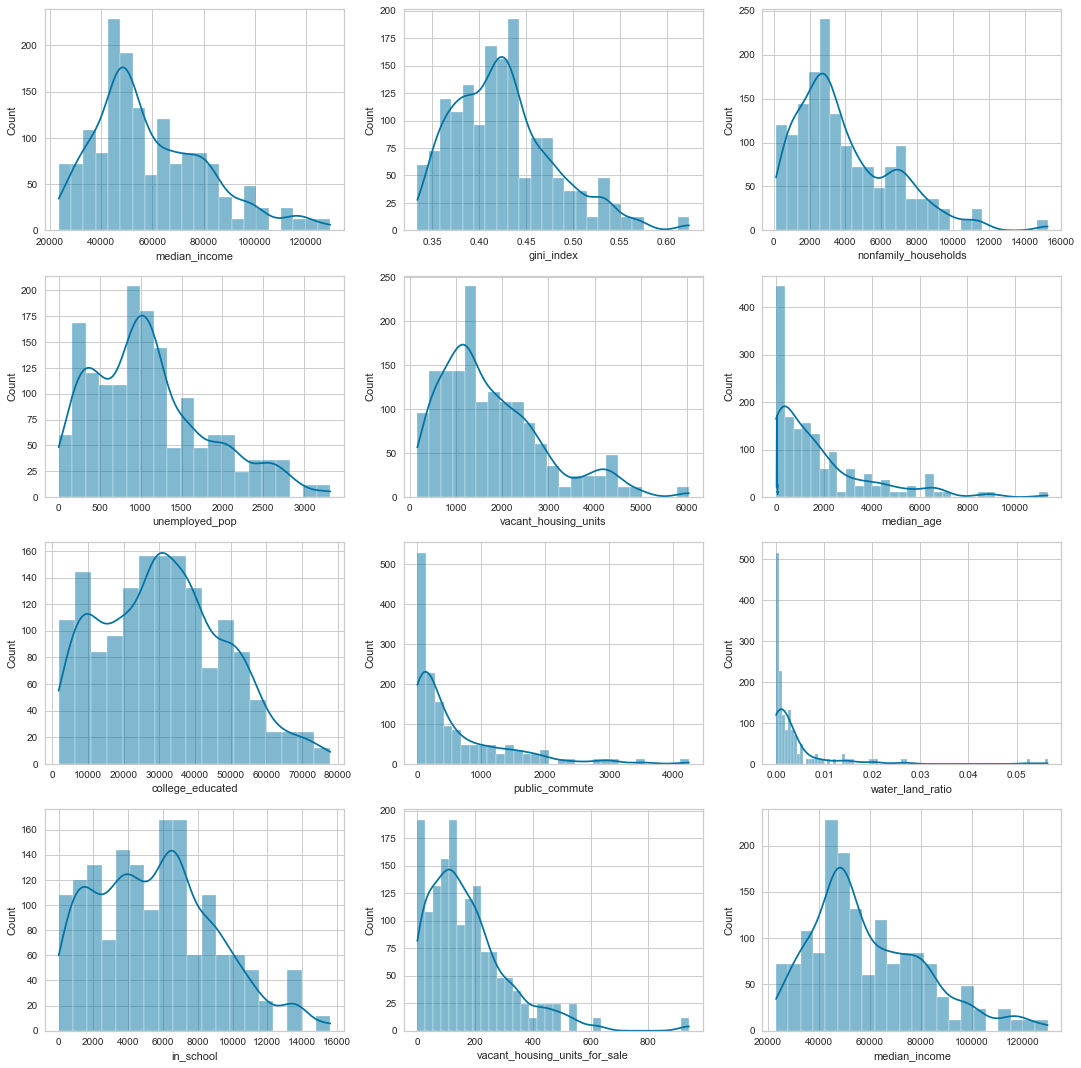

In [592]:
#see a few features
f, axes = plt.subplots(4, 3, figsize=(15,15))

sns.histplot( x= "median_income", data=features,  ax=axes[0,0], kde = True)
sns.histplot( x= "gini_index", data=features,  ax=axes[0,1], kde = True)
sns.histplot( x= "nonfamily_households", data=features, ax=axes[0,2], kde = True)
sns.histplot( x= "unemployed_pop", data=features,  ax=axes[1,0], kde = True)
sns.histplot( x= "vacant_housing_units", data=features,  ax=axes[1,1], kde = True)
sns.histplot( x= "median_age", data=features,  ax=axes[1,2], kde = True)
sns.histplot( x= "large_dwellings", data=features,  ax=axes[1,2], kde = True)
sns.histplot( x= "college_educated", data=features,  ax=axes[2,0], kde = True)
sns.histplot( x= "public_commute", data=features,  ax=axes[2,1], kde = True)
sns.histplot( x= "water_land_ratio", data=features,  ax=axes[2,2], kde = True)
sns.histplot( x= "in_school", data=features,  ax=axes[3,0], kde = True)
sns.histplot( x= "vacant_housing_units_for_sale", data=features,  ax=axes[3,1], kde = True)
sns.histplot( x= "median_income", data=features,  ax=axes[3,2], kde = True)

plt.tight_layout();

In [330]:
# from sklearn.preprocessing import PowerTransformer
   
# pt = PowerTransformer(method = 'yeo-johnson')
# for feature in list(features.select_dtypes(include = ['int64', 'float64'])):
#     features[feature] = pt.fit_transform(features[feature].to_numpy().reshape(-1,1))
#     features[feature] = pt.transform(features[feature].to_numpy().reshape(-1,1))    

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: Runtime

In [593]:
features.head()

,RegionName,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60,zip_code,water_land_ratio
8384,85032,1229.0,2016,1,2016.0,85032.0,0.4175,24828.0,35.5,48608.0,10667.0,16047.0,11318.0,2996.0,37412.0,14726.0,115900.0,177200.0,262000.0,2537.0,607.0,301.0,1972.0,63190.0,72477.0,11067.0,6596.0,19886.0,2715.0,372.0,2093.0,19901.0,16540.0,8221.0,2604.0,23830.0,9699.0,1087.0,21735.0,6527.0,201.0,9258.0,2645.0,535.0,9675.0,20977.0,3395.0,8884.0,20852.0,6380.0,85032.0,0.000525
8385,85281,1245.0,2016,1,2016.0,85281.0,0.5071,18006.0,23.8,31921.0,3530.0,6774.0,15284.0,2637.0,33658.0,4529.0,109500.0,169000.0,237600.0,3991.0,2107.0,40.0,4245.0,46804.0,71138.0,4037.0,2204.0,8262.0,6824.0,1563.0,3464.0,14186.0,16426.0,4530.0,1102.0,24532.0,6251.0,943.0,14020.0,11351.0,479.0,9469.0,5709.0,1872.0,7930.0,23416.0,1121.0,7521.0,18089.0,2443.0,85281.0,0.009828
8386,85225,1183.0,2016,1,2016.0,85225.0,0.4237,25853.0,32.1,56272.0,10504.0,16524.0,8046.0,2456.0,36144.0,13229.0,127100.0,187400.0,251800.0,1801.0,484.0,234.0,952.0,65024.0,65456.0,12222.0,7270.0,19285.0,3883.0,1258.0,4130.0,24756.0,13170.0,8203.0,3197.0,23684.0,8733.0,1745.0,21789.0,3258.0,280.0,8413.0,2070.0,578.0,10416.0,20929.0,2739.0,9657.0,20198.0,4849.0,85225.0,0.000066
8387,85308,1199.0,2016,1,2016.0,85308.0,0.4046,33037.0,39.7,70309.0,13123.0,16999.0,7303.0,2014.0,33410.0,16388.0,162000.0,227900.0,299400.0,2312.0,240.0,336.0,671.0,57522.0,77909.0,9921.0,8012.0,18534.0,3440.0,445.0,1653.0,8384.0,10510.0,8988.0,4804.0,18796.0,9919.0,1699.0,23364.0,2554.0,109.0,5789.0,1405.0,611.0,7310.0,18086.0,4208.0,8069.0,18815.0,7236.0,85308.0,0.019978
8388,85142,1371.0,2016,1,2016.0,85142.0,0.4000,28842.0,32.9,76384.0,11031.0,13312.0,3388.0,943.0,24665.0,13419.0,168700.0,240700.0,347900.0,2814.0,549.0,493.0,96.0,42908.0,54936.0,13592.0,5124.0,13522.0,1255.0,309.0,1459.0,10906.0,6298.0,6543.0,3859.0,8647.0,10686.0,2842.0,18399.0,492.0,73.0,2499.0,424.0,285.0,10976.0,13660.0,2226.0,10117.0,14138.0,3549.0,85142.0,0.000487


### Label

In [594]:
label = df_model[(df_model['year'].isin(['2018']))][['zri']]
label.head()

,zri
11528,1319.0
11529,1314.0
11530,1296.0
11531,1277.0
11532,1459.0


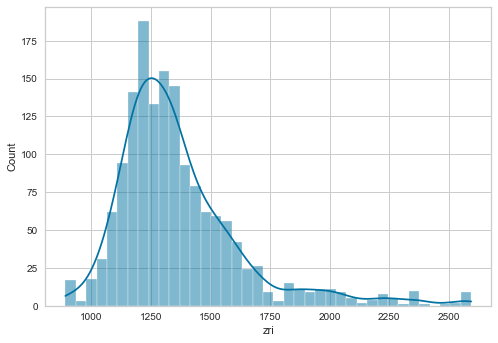

In [595]:
sns.histplot( x= "zri", data=label, kde = True);


In [596]:
label_trans = np.log(label)
label_trans.head()

,zri
11528,7.184629
11529,7.180831
11530,7.167038
11531,7.152269
11532,7.285507


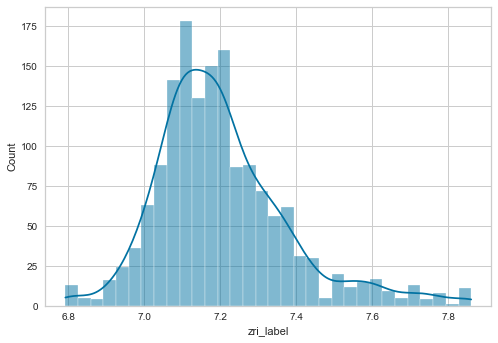

In [597]:
label_trans.rename(columns = {'zri':'zri_label'}, inplace = True)
sns.histplot( x= "zri_label", data=label_trans, kde = True);

In [598]:
label_trans.shape[0]

1560

In [599]:
features.shape[0]

1560

In [600]:
#transform zri to log scale
features['zri'] = pd.to_numeric(features['zri'], errors='coerce')
features['zri'] = np.log(features['zri'])

In [601]:
features = features.reset_index(drop = True)
label_trans = label_trans.reset_index(drop = True)
lab_and_features = pd.concat([label_trans,features], axis = 1)
lab_and_features.head(5)

,zri_label,RegionName,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60,zip_code,water_land_ratio
0,7.184629,85032,7.113956,2016,1,2016.0,85032.0,0.4175,24828.0,35.5,48608.0,10667.0,16047.0,11318.0,2996.0,37412.0,14726.0,115900.0,177200.0,262000.0,2537.0,607.0,301.0,1972.0,63190.0,72477.0,11067.0,6596.0,19886.0,2715.0,372.0,2093.0,19901.0,16540.0,8221.0,2604.0,23830.0,9699.0,1087.0,21735.0,6527.0,201.0,9258.0,2645.0,535.0,9675.0,20977.0,3395.0,8884.0,20852.0,6380.0,85032.0,0.000525
1,7.180831,85281,7.126891,2016,1,2016.0,85281.0,0.5071,18006.0,23.8,31921.0,3530.0,6774.0,15284.0,2637.0,33658.0,4529.0,109500.0,169000.0,237600.0,3991.0,2107.0,40.0,4245.0,46804.0,71138.0,4037.0,2204.0,8262.0,6824.0,1563.0,3464.0,14186.0,16426.0,4530.0,1102.0,24532.0,6251.0,943.0,14020.0,11351.0,479.0,9469.0,5709.0,1872.0,7930.0,23416.0,1121.0,7521.0,18089.0,2443.0,85281.0,0.009828
2,7.167038,85225,7.075809,2016,1,2016.0,85225.0,0.4237,25853.0,32.1,56272.0,10504.0,16524.0,8046.0,2456.0,36144.0,13229.0,127100.0,187400.0,251800.0,1801.0,484.0,234.0,952.0,65024.0,65456.0,12222.0,7270.0,19285.0,3883.0,1258.0,4130.0,24756.0,13170.0,8203.0,3197.0,23684.0,8733.0,1745.0,21789.0,3258.0,280.0,8413.0,2070.0,578.0,10416.0,20929.0,2739.0,9657.0,20198.0,4849.0,85225.0,0.000066
3,7.152269,85308,7.089243,2016,1,2016.0,85308.0,0.4046,33037.0,39.7,70309.0,13123.0,16999.0,7303.0,2014.0,33410.0,16388.0,162000.0,227900.0,299400.0,2312.0,240.0,336.0,671.0,57522.0,77909.0,9921.0,8012.0,18534.0,3440.0,445.0,1653.0,8384.0,10510.0,8988.0,4804.0,18796.0,9919.0,1699.0,23364.0,2554.0,109.0,5789.0,1405.0,611.0,7310.0,18086.0,4208.0,8069.0,18815.0,7236.0,85308.0,0.019978
4,7.285507,85142,7.223296,2016,1,2016.0,85142.0,0.4000,28842.0,32.9,76384.0,11031.0,13312.0,3388.0,943.0,24665.0,13419.0,168700.0,240700.0,347900.0,2814.0,549.0,493.0,96.0,42908.0,54936.0,13592.0,5124.0,13522.0,1255.0,309.0,1459.0,10906.0,6298.0,6543.0,3859.0,8647.0,10686.0,2842.0,18399.0,492.0,73.0,2499.0,424.0,285.0,10976.0,13660.0,2226.0,10117.0,14138.0,3549.0,85142.0,0.000487


Drop all the rows that don't have a value for the 2017 zri label

In [477]:
missing_labels = lab_and_features[(lab_and_features['zri_label'].isna())].index
lab_and_features = lab_and_features.drop(index = missing_labels)
lab_and_features.shape[0]

1554

In [478]:
print_missingness(lab_and_features)

The number of observations is 1554
The number of variables is 52
    
The total number of missing values is 10
The number of rows with missing values is 10
---   ---   ---   ---   ---   ---   ---   ---   ---
zri    10
dtype: int64


## Benchmark model
### Predicting zri with historical zri values

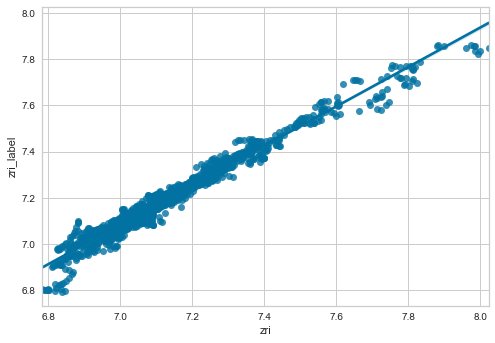

In [479]:

sns.regplot( x= "zri", y = 'zri_label', data=lab_and_features);

#### Train test split

In [586]:
from sklearn.model_selection import train_test_split

Xbase = lab_and_features[['zri']]
y = lab_and_features['zri_label']
#benchmark model

XtrainB, XtestB, ytrainB, ytestB = train_test_split(Xbase,y)

### Imputation

In [587]:
XtrainB = XtrainB.fillna(method = 'ffill')
XtestB = XtestB.fillna(method = 'ffill')

No need to do scaling since the data are on the same scale and similar distributions

### OLS

In [588]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

base_ols = LinearRegression()
base_ols.fit(XtrainB,ytrainB)

print(f'Linear regression training score: {base_ols.score(XtrainB,ytrainB)}')
print(f'Linear regression testing score: {base_ols.score(XtestB,ytestB)}')

y_pred = base_ols.predict(XtestB)
RMSE = mean_squared_error(ytestB,y_pred,squared = False)
print(f'Linear regression RMSE: {RMSE}')

Linear regression training score: 0.9698734291692265
Linear regression testing score: 0.9654388860246227
Linear regression RMSE: 0.03122804223601136


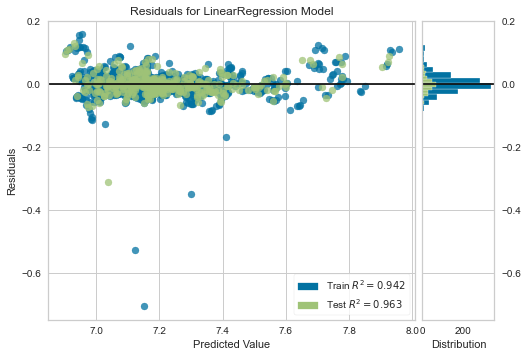

In [487]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(base_ols)
visualizer.fit(XtrainB, ytrainB) 
visualizer.score(XtestB, ytestB)  
visualizer.show() ;

In [490]:
#The final model to get the residuals will be trained in the whole data

Xbase_final = Xbase.fillna(method = 'ffill')

final_base_ols = LinearRegression()
final_base_ols.fit(Xbase_final, y)


LinearRegression()

In [491]:
predictions = final_base_ols.predict(Xbase_final) #gives an array
predictions

array([7.18159268, 7.19253701, 7.14931546, ..., 7.71186428, 7.02553451,
       6.98569969])

In [492]:
residuals = y - predictions
residuals[:5]

0    0.003036
1   -0.011706
2    0.017722
3   -0.008414
4    0.011399
Name: zri_label, dtype: float64

Add residuals to the label and features dataframe

In [602]:
lab_and_features['residuals'] = residuals
lab_and_features.head(3)

,zri_label,RegionName,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60,zip_code,water_land_ratio,residuals
0,7.184629,85032,7.113956,2016,1,2016.0,85032.0,0.4175,24828.0,35.5,48608.0,10667.0,16047.0,11318.0,2996.0,37412.0,14726.0,115900.0,177200.0,262000.0,2537.0,607.0,301.0,1972.0,63190.0,72477.0,11067.0,6596.0,19886.0,2715.0,372.0,2093.0,19901.0,16540.0,8221.0,2604.0,23830.0,9699.0,1087.0,21735.0,6527.0,201.0,9258.0,2645.0,535.0,9675.0,20977.0,3395.0,8884.0,20852.0,6380.0,85032.0,0.000525,0.003036
1,7.180831,85281,7.126891,2016,1,2016.0,85281.0,0.5071,18006.0,23.8,31921.0,3530.0,6774.0,15284.0,2637.0,33658.0,4529.0,109500.0,169000.0,237600.0,3991.0,2107.0,40.0,4245.0,46804.0,71138.0,4037.0,2204.0,8262.0,6824.0,1563.0,3464.0,14186.0,16426.0,4530.0,1102.0,24532.0,6251.0,943.0,14020.0,11351.0,479.0,9469.0,5709.0,1872.0,7930.0,23416.0,1121.0,7521.0,18089.0,2443.0,85281.0,0.009828,-0.011706
2,7.167038,85225,7.075809,2016,1,2016.0,85225.0,0.4237,25853.0,32.1,56272.0,10504.0,16524.0,8046.0,2456.0,36144.0,13229.0,127100.0,187400.0,251800.0,1801.0,484.0,234.0,952.0,65024.0,65456.0,12222.0,7270.0,19285.0,3883.0,1258.0,4130.0,24756.0,13170.0,8203.0,3197.0,23684.0,8733.0,1745.0,21789.0,3258.0,280.0,8413.0,2070.0,578.0,10416.0,20929.0,2739.0,9657.0,20198.0,4849.0,85225.0,0.000066,0.017722


In [603]:
#lab_and_features.to_csv('./data/Phoe_df_predict_2018_w2016.csv')

#### Residuals EDA

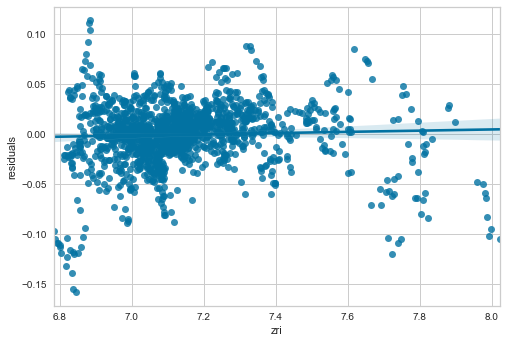

In [494]:
sns.regplot( x= "zri", y = 'residuals', data=lab_and_features);

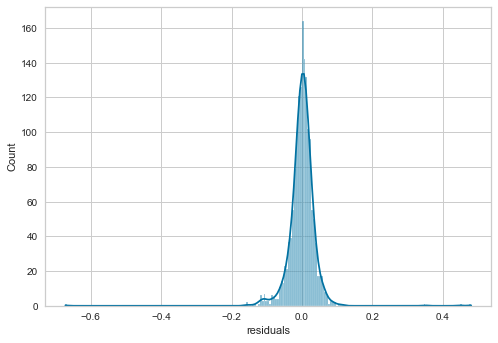

In [495]:
sns.histplot( x= "residuals", data=lab_and_features, kde = True);

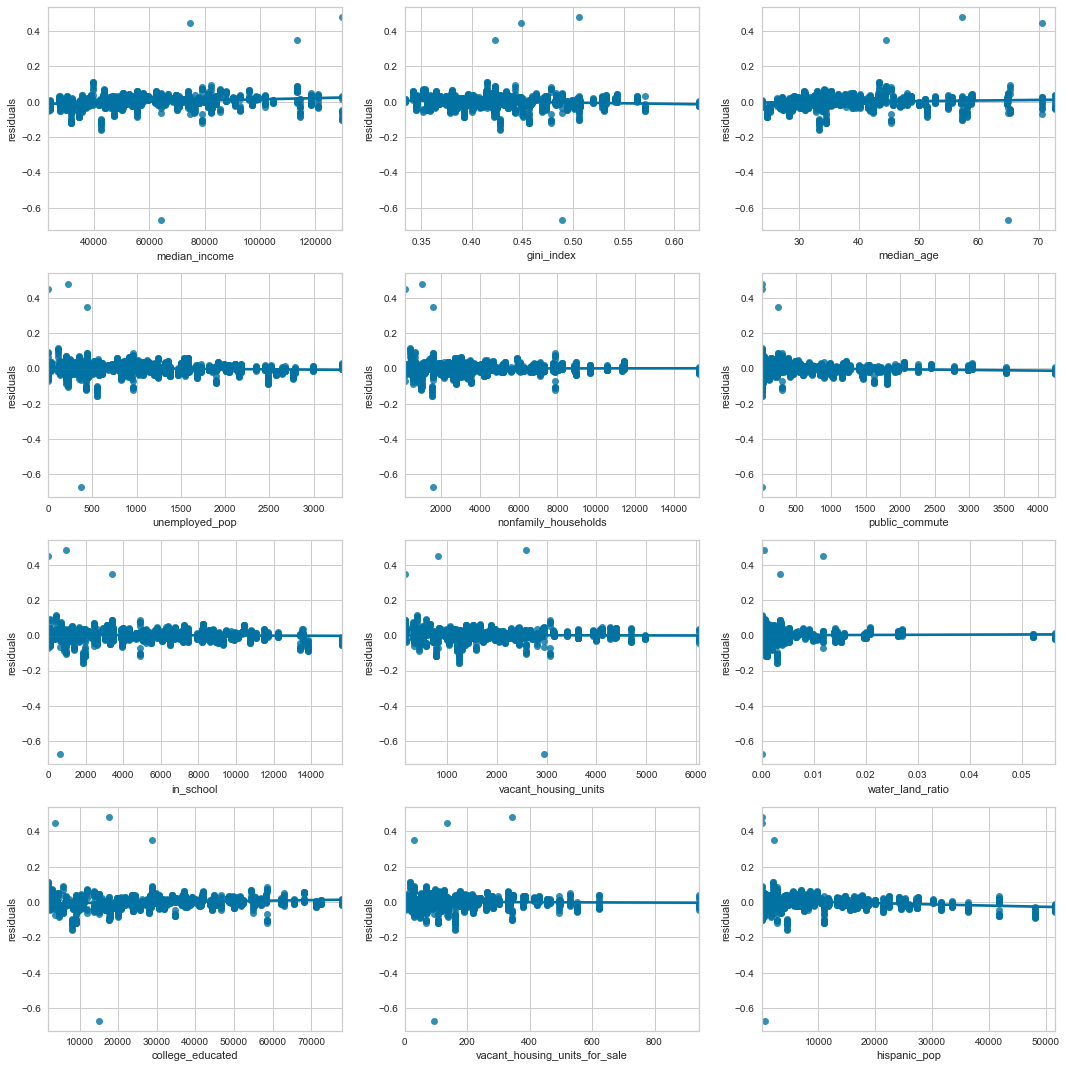

In [497]:
f, axes = plt.subplots(4, 3, figsize=(15,15))

sns.regplot( x= "median_income", y = 'residuals', data=lab_and_features,  ax=axes[0,0])
sns.regplot( x= "gini_index",y = 'residuals', data=lab_and_features,  ax=axes[0,1])
sns.regplot( x= "median_age", y = 'residuals', data=lab_and_features,  ax=axes[0,2])
sns.regplot( x= "unemployed_pop", y = 'residuals', data=lab_and_features,  ax=axes[1,0])
sns.regplot( x= "nonfamily_households", y = 'residuals',data=lab_and_features,  ax=axes[1,1])
sns.regplot( x= "public_commute", y = 'residuals',data=lab_and_features,  ax=axes[1,2])
sns.regplot( x= "in_school", y = 'residuals',data=lab_and_features,  ax=axes[2,0])
sns.regplot( x= "vacant_housing_units", y = 'residuals',data=lab_and_features,  ax=axes[2,1])
sns.regplot( x= "water_land_ratio", y = 'residuals',data=lab_and_features,  ax=axes[2,2])
sns.regplot( x= "college_educated", y = 'residuals',data=lab_and_features,  ax=axes[3,0])
sns.regplot( x= "vacant_housing_units_for_sale", y = 'residuals',data=lab_and_features,  ax=axes[3,1])
sns.regplot( x= "hispanic_pop", y = 'residuals',data=lab_and_features,  ax=axes[3,2])

plt.tight_layout();

The residuals don't have an obvious linear relationship with any of the predictors. So I'll try a tree model

### Modeling the residuals

In [363]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  GridSearchCV, KFold

In [498]:
print_missingness(lab_and_features)

The number of observations is 1554
The number of variables is 53
    
The total number of missing values is 10
The number of rows with missing values is 10
---   ---   ---   ---   ---   ---   ---   ---   ---
zri    10
dtype: int64


In [499]:
lab_and_features.dropna(inplace = True)

In [534]:
Xrfr = lab_and_features.drop(columns = ['residuals','zri',
                                        'zri_label', 'year',
                                        'month', 'geo_id',
                                       'zip_code','Year','RegionName'])
Yrfr = lab_and_features['residuals'] 
print(Xrfr.shape)
print(len(Yrfr))

(1544, 45)
1544


In [535]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xrfr,Yrfr)

In [536]:
Xtrain.sample(5)

,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60,water_land_ratio
880,0.4724,12023.0,29.2,30202.0,2725.0,4992.0,1949.0,610.0,8871.0,3445.0,63600.0,92300.0,143300.0,1259.0,686.0,93.0,456.0,16122.0,10306.0,5074.0,1646.0,7174.0,849.0,508.0,1778.0,16224.0,5360.0,1354.0,227.0,4368.0,3580.0,605.0,6761.0,1348.0,36.0,1640.0,1185.0,635.0,4314.0,6522.0,850.0,4117.0,6782.0,1387.0,0.001727
1128,0.3785,32001.0,42.3,76015.0,4661.0,6261.0,2637.0,824.0,12567.0,5882.0,159300.0,214100.0,295600.0,1217.0,452.0,219.0,106.0,22734.0,27861.0,3908.0,2990.0,9765.0,1277.0,201.0,916.0,3448.0,3603.0,3548.0,1747.0,6604.0,4317.0,785.0,7820.0,2250.0,198.0,1989.0,702.0,127.0,2695.0,6573.0,2001.0,3225.0,6893.0,3526.0,0.000933
1321,0.4344,41410.0,58.9,66614.0,9162.0,10146.0,4653.0,522.0,11717.0,11668.0,193200.0,286400.0,386700.0,2935.0,217.0,199.0,76.0,20174.0,44795.0,2928.0,4498.0,9445.0,2595.0,607.0,451.0,2703.0,6654.0,4919.0,3226.0,6803.0,3169.0,528.0,15574.0,1368.0,176.0,1743.0,926.0,286.0,2492.0,5619.0,6131.0,2527.0,5855.0,8458.0,0.002320
253,0.4203,21135.0,39.1,50489.0,1328.0,1763.0,453.0,243.0,2536.0,1950.0,106300.0,159000.0,254400.0,528.0,13.0,81.0,0.0,4234.0,4526.0,1259.0,942.0,3205.0,114.0,0.0,40.0,422.0,1322.0,778.0,116.0,732.0,946.0,448.0,1958.0,0.0,0.0,123.0,106.0,37.0,1037.0,1506.0,510.0,847.0,1915.0,611.0,0.001160
268,0.4137,19925.0,32.3,46433.0,9648.0,14191.0,7093.0,2513.0,30475.0,11702.0,82900.0,132300.0,182500.0,2405.0,583.0,464.0,1283.0,53488.0,49294.0,11698.0,6566.0,19879.0,871.0,838.0,1096.0,30106.0,13842.0,6211.0,1231.0,19016.0,8395.0,1510.0,18081.0,3014.0,222.0,6344.0,2637.0,379.0,10335.0,18462.0,2913.0,8647.0,17251.0,5547.0,0.000483


In [537]:
rfr = RandomForestRegressor()
rfr.fit(Xtrain, ytrain)
print(f'RF regression training score: {rfr.score(Xtrain, ytrain)}')
print(f'RF regression testing score: {rfr.score(Xtest, ytest)}')

RF regression training score: 0.6321303344445954
RF regression testing score: 0.588159406851787


In [538]:
#parameters grid
params = {'ccp_alpha':[0,0.00001], #lets decrease the size of each tree
         'n_estimators': [200, 300, 400],
         'min_samples_leaf':[5, 10, 20],
         'max_features':[0.3, 0.4]}
cv = KFold(n_splits = 5, shuffle= True)

grid = GridSearchCV(estimator = rfr,
                   param_grid = params,
                   cv = cv,
                   return_train_score = True)

grid.fit(Xtrain, np.ravel(ytrain))

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [0, 1e-05], 'max_features': [0.3, 0.4],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [200, 300, 400]},
             return_train_score=True)

In [539]:
grid.best_params_

{'ccp_alpha': 0,
 'max_features': 0.4,
 'min_samples_leaf': 5,
 'n_estimators': 200}

In [545]:
best_rf = grid.best_estimator_
print(f'RF best regression training score: {best_rf.score(Xtrain, ytrain)}')
print(f'RF best regression testing score: {best_rf.score(Xtest, ytest)}')

RF best regression training score: 0.6247299307507114
RF best regression testing score: 0.5817500972984619


In [546]:
feat_imp = pd.Series(rfr.feature_importances_, index = Xtrain.columns)
feat_imp.sort_values(ascending = False)

income_per_capita                                    0.152674
median_income                                        0.060501
vacant_housing_units_for_rent                        0.053226
income_over_125000                                   0.050897
asian_pop                                            0.048177
owner_occupied_housing_units_upper_value_quartile    0.046631
vacant_housing_units                                 0.044710
vacant_housing_units_for_sale                        0.038733
large_dwellings                                      0.037098
black_pop                                            0.036757
owner_occupied_housing_units_median_value            0.029964
rent_over50                                          0.029198
water_land_ratio                                     0.023278
male_over_60                                         0.021693
rent_under10                                         0.019816
hispanic_pop                                         0.019516
amerindi

In [547]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(Xtrain, np.ravel(ytrain))

GradientBoostingRegressor()

In [548]:
print(gbr.score(Xtrain,ytrain))
print(gbr.score(Xtest,ytest))

y_pred = gbr.predict(Xtest)
RMSE = mean_squared_error(ytest,y_pred,squared = False)
print(f'Gradient Boosting RMSE: {RMSE}')

0.6191316450944329
0.6002036975344935
Gradient Boosting RMSE: 0.0205038869370773


In [549]:
paramsGB = {'loss': ['ls', 'huber'],
            'learning_rate':[.01,1,10], #lets decrease the size of each tree
            'n_estimators': [50, 100, 200],
            'max_depth':[3, 4]}

In [550]:
gridGB = GridSearchCV(estimator = gbr,
                       param_grid = paramsGB,
                       cv = cv,
                       return_train_score = True)

gridGB.fit(Xtrain, np.ravel(ytrain))

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-p

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/si

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/si

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packa

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:603: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:603: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
/Applications/anaconda3/lib/python

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packa

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packa

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/si

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/py

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/py

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/py

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 1, 10],
                         'loss': ['ls', 'huber'], 'max_depth': [3, 4],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True)

In [552]:
gridGB.best_params_

{'learning_rate': 1, 'loss': 'ls', 'max_depth': 3, 'n_estimators': 50}

In [553]:
best_gb = gridGB.best_estimator_
print(f'GB best regression training score: {best_gb.score(Xtrain, ytrain)}')
print(f'GB best regression testing score: {best_gb.score(Xtest, ytest)}')

GB best regression training score: 0.6328214224992119
GB best regression testing score: 0.5967529184221356


The best gradient boosting model from the grid search is worse than the default one. It is definetly overfit. Keep the params

In [604]:
feat_impGB = pd.Series(gbr.feature_importances_, index = Xtrain.columns)
feat_impGB.sort_values(ascending = False).head(15)

income_per_capita                                    0.158426
median_income                                        0.079613
asian_pop                                            0.071757
rent_under10                                         0.047603
vacant_housing_units_for_rent                        0.045795
black_pop                                            0.045372
vacant_housing_units                                 0.044312
vacant_housing_units_for_sale                        0.042086
large_dwellings                                      0.039892
owner_occupied_housing_units_median_value            0.034774
owner_occupied_housing_units_upper_value_quartile    0.028118
median_age                                           0.024687
water_land_ratio                                     0.024069
income_less_than_125000                              0.024010
unemployed_pop                                       0.023169
dtype: float64